In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)

#checking the missing rows
#print(data.isna().sum())
#checking the type of each rows
#data.info()



# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))

#establishing the training set and the test set
x=data.drop(["stroke"],axis=1)
y=data["stroke"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape

# Normalize feature data
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Saving the feature names 
features = x.columns.tolist()

import time
startTime = time.time()
##Decision tree
dt=DecisionTreeClassifier(max_depth=5,random_state=42,criterion="gini",splitter="best",min_samples_split=10,max_leaf_nodes=15)
dt.fit(x_train,y_train)


# Extracting the importances by sklearn 
importances_sk = dt.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
    
print(f"Feature importance by sklearn: {feature_importance_sk}")



#Evaluate the accuracy of the model
y_pred = dt.predict(x_test)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Feature importance by sklearn: {'age': 0.538, 'hypertension': 0.0, 'heart_disease': 0.075, 'ever_married': 0.022, 'work_type': 0.0, 'Residence_type': 0.0, 'avg_glucose_level': 0.164, 'bmi': 0.172, 'smoking_status': 0.03}
The accuracy is:  94.24749163879599 %
Execution time in seconds: 0.015628337860107422


In [6]:
#creating reduced vectors
x=data.drop(columns=['stroke', 'hypertension','work_type','Residence_type','ever_married','smoking_status'])
y=data["stroke"]

         age  heart_disease  avg_glucose_level   bmi
gender                                              
Male    67.0              1             228.69  36.6
Male    80.0              1             105.92  32.5
Female  49.0              0             171.23  34.4
Female  79.0              0             174.12  24.0
Male    81.0              0             186.21  29.0
...      ...            ...                ...   ...
Male    41.0              0              70.15  29.8
Male    40.0              0             191.15  31.1
Female  45.0              0              95.02  31.8
Male    40.0              0              83.94  30.0
Female  80.0              0              83.75  29.1

[4981 rows x 4 columns]
For n_clusters = 2 The average silhouette_score is : 0.6460011904495458
For n_clusters = 3 The average silhouette_score is : 0.38326070596252526
For n_clusters = 4 The average silhouette_score is : 0.38733039848828466
For n_clusters = 5 The average silhouette_score is : 0.3646614779298

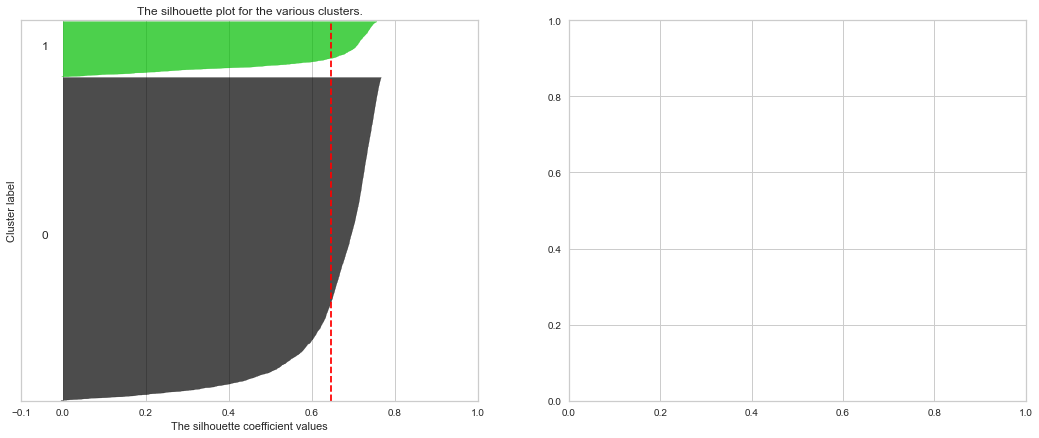

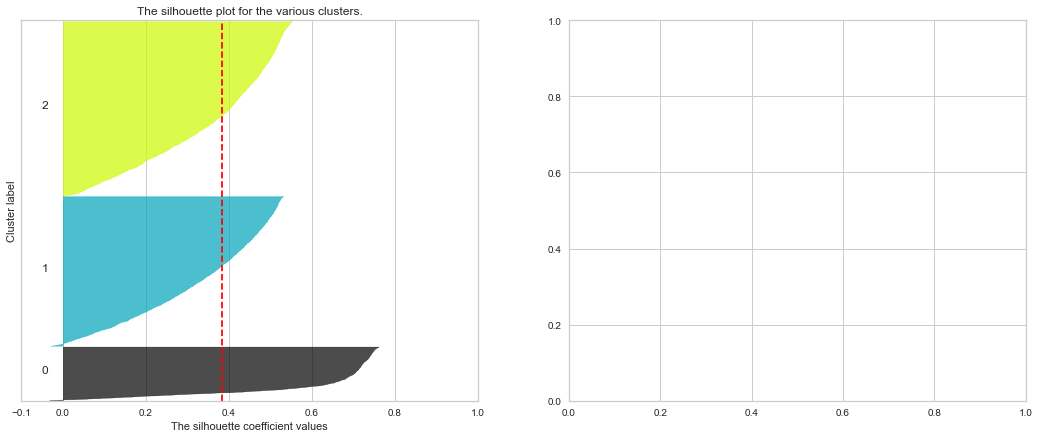

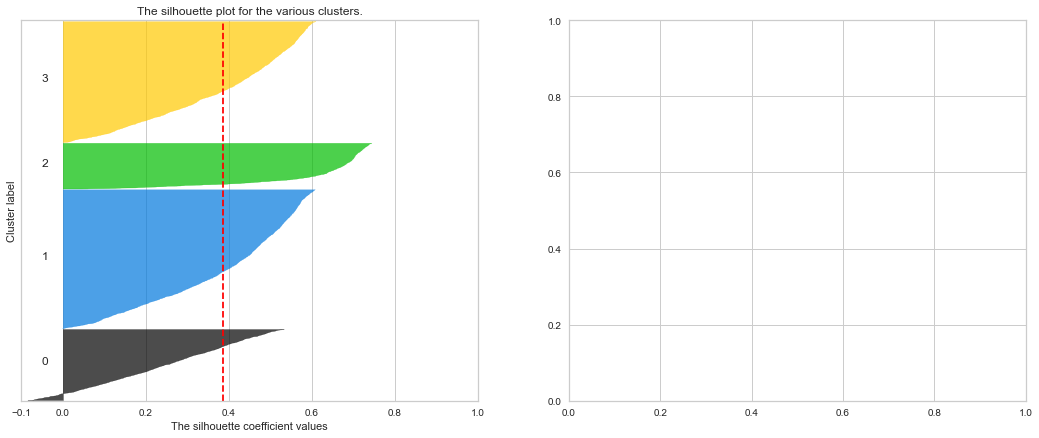

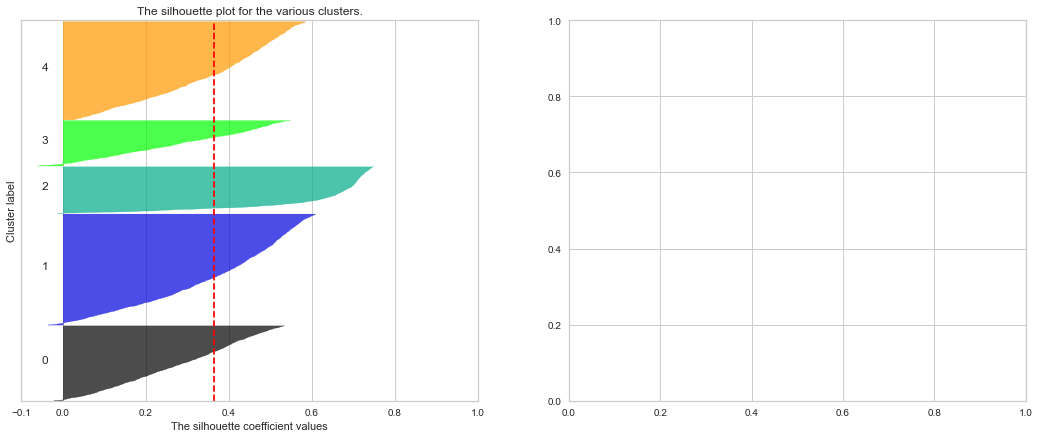

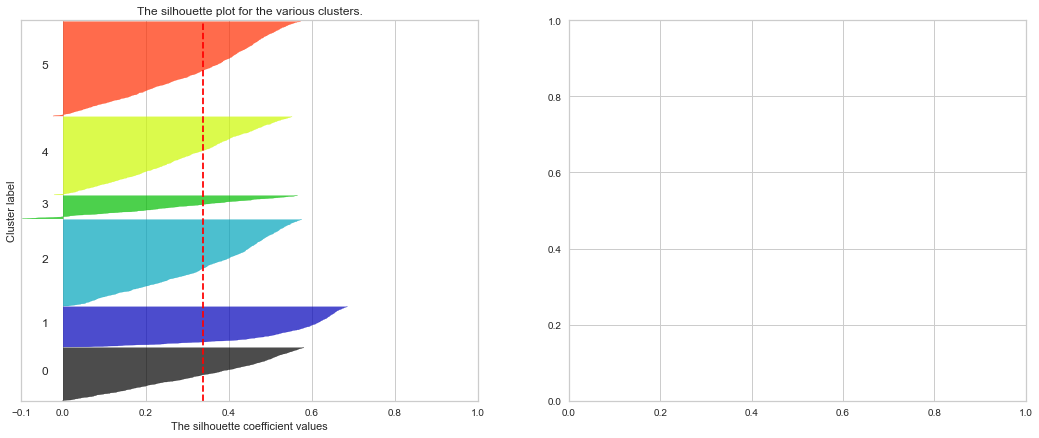

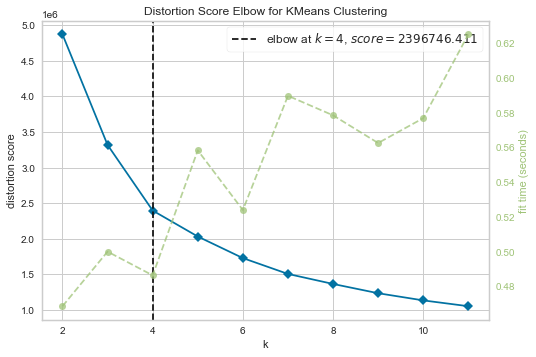

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 0 1 ... 0 0 0]
[1 0 1 ... 0 0 0]
[0 2 0 ... 2 2 2]
[0 2 0 ... 2 2 2]
[2 1 2 ... 1 1 1]
[2 1 2 ... 1 1 1]
[2 0 2 ... 0 1 4]
[2 0 2 ... 0 1 4]
[1 4 3 ... 4 5 2]
[1 4 3 ... 4 5 2]
[4 2 1 ... 2 0 3]
[4 2 1 ... 2 0 3]
[1 7 6 ... 7 5 2]
[1 7 6 ... 7 5 2]
[0 3 6 ... 1 4 7]
[0 3 6 ... 1 4 7]


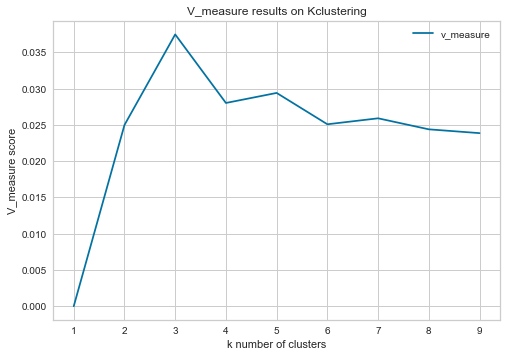

In [9]:
X=x
print(X)
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    '''
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:,0], X[:,3], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
'''
plt.show()

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

labels_true=y
v_measure_list=[]
for k in range(1,10):
    clusterer = KMeans(n_clusters=k, random_state=42)
    labels_pred = clusterer.fit_predict(X)
    print(clusterer.labels_)
    print(labels_pred)
    score=metrics.v_measure_score(labels_true, clusterer.labels_)
    v_measure_list.append(score)

k_clusters=[k for k in range(1,10)]
fig, ax1=plt.subplots()
ax1.plot(k_clusters, v_measure_list,label="v_measure")
ax1.set_title('V_measure results on Kclustering')
ax1.set_xlabel('k number of clusters')
ax1.set_ylabel('V_measure score')
ax1.legend()
plt.show()